In [1]:
import numpy as np
import matplotlib.pyplot as pl
import scipy.optimize as opt

EJERCICIO 1 Modellisation

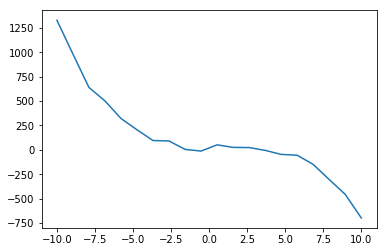

In [4]:
#Ejercicio 3
# 3.1
true_val=[-1,3,2,10]
pol=np.poly1d([-1,3,2,10]) 
# 3.2
x=np.linspace(-10,10,20)
y=pol(x)
noise=25*np.random.randn(x.size)
y=y+noise
# Hacemos plot de los datos
pl.plot(x,y)

In [5]:
#3.3
a=np.polyfit(x,y,3)
Fit=np.poly1d(a) # esto es una manera compacta de poner la función 
                #def pol3(x,*a):      
                #    return a[0]*x^3+a[1]*x^2+a[2]*x+a[3]   
print ('pol parametres =',a)
print ('true val=',true_val)

('pol parametres =', array([-1.00580614,  2.94242825,  0.14128499, 18.98773406]))
('true val=', [-1, 3, 2, 10])


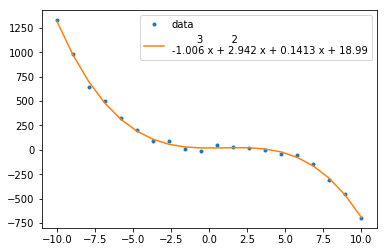

In [12]:
pl.plot(x,y,'.',label='data')
pl.plot(x,Fit(x),label=Fit)
pl.legend()

In [13]:
# 3.4 
print 'Media error cuadrático (o residuos)',np.mean((y-Fit(x))**2) /len(y)

Media error cuadrático (o residuos) 25.08720041590643


*********************************
EJERCICIO 2 Modelization
*********************************

In [14]:
# 4.1
def func(x,a,b,f,phi):
     return a*np.exp(-b*np.sin(f*x+phi))

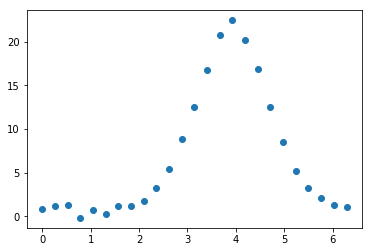

In [65]:
data=np.loadtxt('Data_exp.txt')
x=data[:,0];y=data[:,1]
pl.plot(x,y,'o',label='data')

[3.54419323 1.82841202 1.02917804 0.67684398]


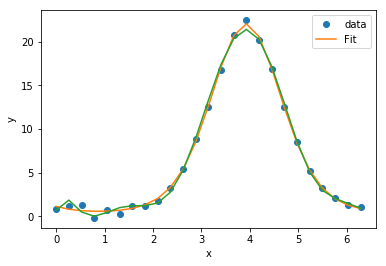

In [66]:
popt,pcov=opt.curve_fit(func,x,y)
res=np.polyfit(x,y,9)
Fit=np.poly1d(res)
print popt  # EN POPT HAY LOS PARAMTROS DEL MODELO: a, b, f y phi estimados
pl.plot(x,y,'o',label='data')
pl.plot(x,func(x,*popt),label='Fit')
pl.plot(x,Fit(x))
pl.xlabel('x')
pl.ylabel('y')
pl.legend()


[10 11 12 13 14]


array([1326.3133982 , 1170.15382293,  670.01391187,  324.26395676,
        249.53664965,   63.18450372,   63.04484826,   18.64780728,
         13.27043396,    4.78299797,    0.        ,    0.        ,
          0.        ,    0.        ,    0.        ])

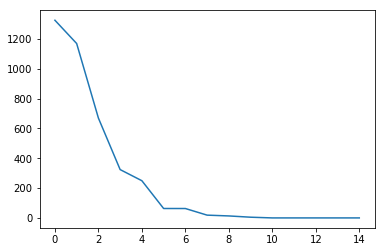

In [67]:
mse=np.zeros(15);grad=np.zeros(15)
for i in xrange(0,10):
    res=np.polyfit(x,y,i)
    Fit=np.poly1d(res)
    mse[i]=np.sum((Fit(x)-y)**2)
    grad[i]=i
print np.where(mse==min(mse))[0]
pl.plot(mse)
mse

2.159188005925652 4.782997965955963


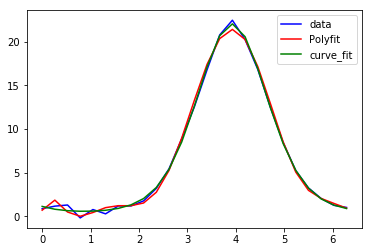

In [71]:
res=np.polyfit(x,y,9)
Fit=np.poly1d(res)
pl.plot(x, y, 'b-', label='data')
pl.plot(x,Fit(x),'r',label='Polyfit')
pl.plot(x, func(x,*popt), 'g',label='curve_fit')
pl.legend()
mse=np.sum((func(x,*popt)-y)**2)
print mse,np.sum((Fit(x)-y)**2)

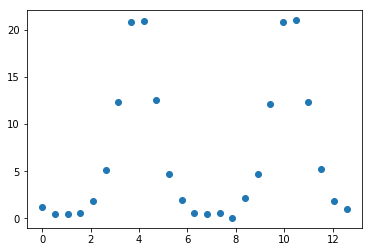

In [72]:
data=np.loadtxt('Data_exp_large.txt')
xlarge=data[:,0];ylarge=data[:,1]
pl.plot(xlarge,ylarge,'o',label='data')

(0, 200)

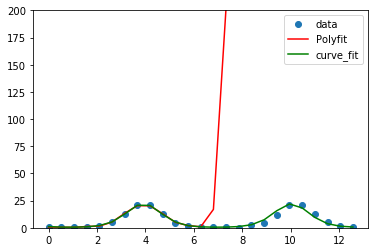

In [73]:
pl.plot(xlarge,ylarge,'o',label='data')
pl.plot(xlarge,Fit(xlarge),'r',label='Polyfit')
pl.plot(xlarge, func(xlarge,*popt), 'g',label='curve_fit')
pl.legend()
pl.ylim(0,200)

*********************************
EJERCICIO 3
*********************************

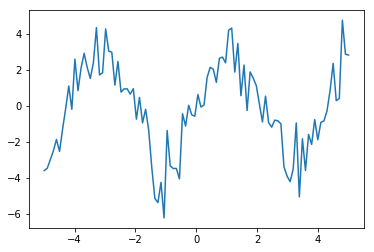

In [76]:
# Ejercicio 5
def func(x, a, b):
    return a * np.sin(b * x)
x=np.linspace(-5,5,100)
y=func(x,2.9,1.5)+np.random.randn(len(x))
c=np.transpose([x,y])
#np.savetxt('dataSin.txt',c)
pl.plot(x,y)
import numpy as np
#data=np.loadtxt('dataSin.txt')
#x=data[:,0]
#y=data[:,1]
true_val=[2.9,1.5]
#pl.plot(x,y)


112.43182110647489


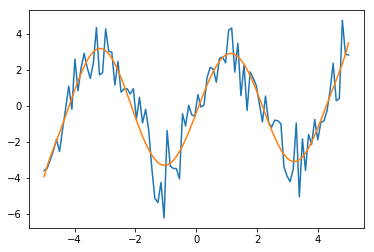

In [79]:
res=np.polyfit(x,y,9)
Fit=np.poly1d(res)
pl.plot(x,y)
pl.plot(x,Fit(x))
mse=np.sum((Fit(x)-y)**2)
print mse

/usr/local/lib/python2.7/site-packages/ipykernel_launcher.py:4: RankWarning: Polyfit may be poorly conditioned
  after removing the cwd from sys.path.
/usr/local/lib/python2.7/site-packages/ipykernel_launcher.py:4: RankWarning: Polyfit may be poorly conditioned
  after removing the cwd from sys.path.
/usr/local/lib/python2.7/site-packages/ipykernel_launcher.py:4: RankWarning: Polyfit may be poorly conditioned
  after removing the cwd from sys.path.
/usr/local/lib/python2.7/site-packages/ipykernel_launcher.py:4: RankWarning: Polyfit may be poorly conditioned
  after removing the cwd from sys.path.
/usr/local/lib/python2.7/site-packages/ipykernel_launcher.py:4: RankWarning: Polyfit may be poorly conditioned
  after removing the cwd from sys.path.
/usr/local/lib/python2.7/site-packages/ipykernel_launcher.py:4: RankWarning: Polyfit may be poorly conditioned
  after removing the cwd from sys.path.
/usr/local/lib/python2.7/site-packages/ipykernel_launcher.py:4: RankWarning: Polyfit may be po

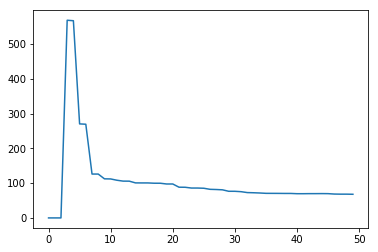

In [78]:
# podemos probar a mano e ir mirando plot o calcular residuos
mse=np.zeros(50);grad=np.zeros(50)
for i in xrange(3,50):
    res=np.polyfit(x,y,i)
    Fit=np.poly1d(res)
    mse[i]=np.sum((Fit(x)-y)**2)
    grad[i]=i
pl.plot(mse)

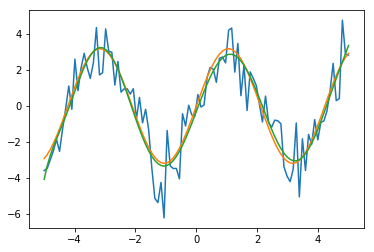

In [83]:
# parece que a 9 o 10 ya ha convergido
res=np.polyfit(x,y,10)
Fit=np.poly1d(res)
# ahora curve_fit con la función de verdad
popt,pcov=opt.curve_fit(func,x,y)
pl.plot(x,y)
pl.plot(x,func(x,*popt))
pl.plot(x,Fit(x))


2.159188005925652 2.0152446882825785


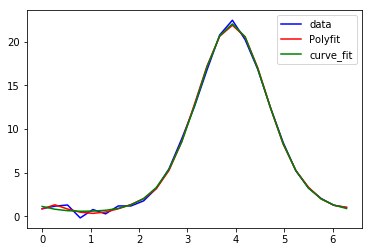